# Find the NLIW limits

In [1]:
import os
import glob
import numpy as np
import xarray as xr
from wootils.plotnice import vert_stack, basic_ts, plot_align
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_theme(style="white")
sns.set_style("ticks")

import sys
sys.path.insert(0, '../../')
from chp3_fluxfuncs import get_nliw_times

In [2]:
fieldtrip = 'RS2019'
sig_fol = 'Signature'
moor = 'L150'

nc_dir = r'/mnt/c/Users/00099894/Large_Data/'
temp_file = '[RS2019]_[RS19_REC]_[T150]_[multi(26)_nominal_instrument_height_asb]_[multi(2)_instrument_model]_[multi(26)_instrument_serial_number]_[no_outfile_append].nc'

# Load temp data
temp_nc = os.path.join(nc_dir, fieldtrip, temp_file)
ds_temp = xr.open_dataset(temp_nc)#, group=moor)
ds_temp.close()

# ADCP
tree_in = glob.glob(os.path.join(nc_dir, fieldtrip, '*T150*RDI 150 kHz*.nc'))
ds_adcp = xr.open_dataset(tree_in[0])

In [3]:
wav_tx = get_nliw_times()

t_bef = np.timedelta64(30,'m')
t_aft = np.timedelta64(180,'m')

In [4]:
# Save a figure for every ADCP file
#### Done in the solibore notebook

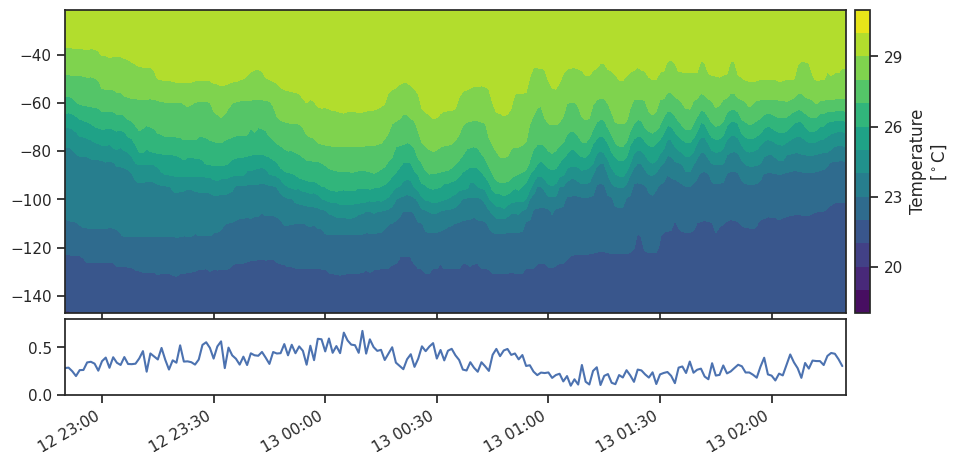

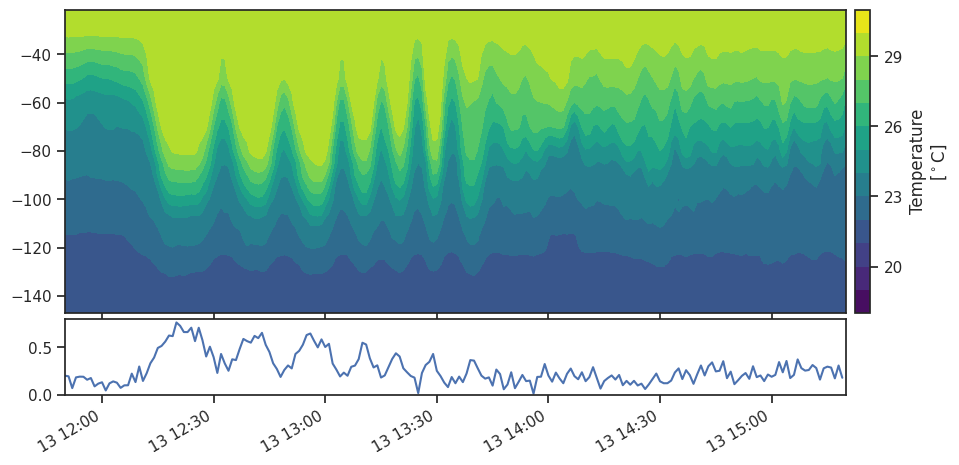

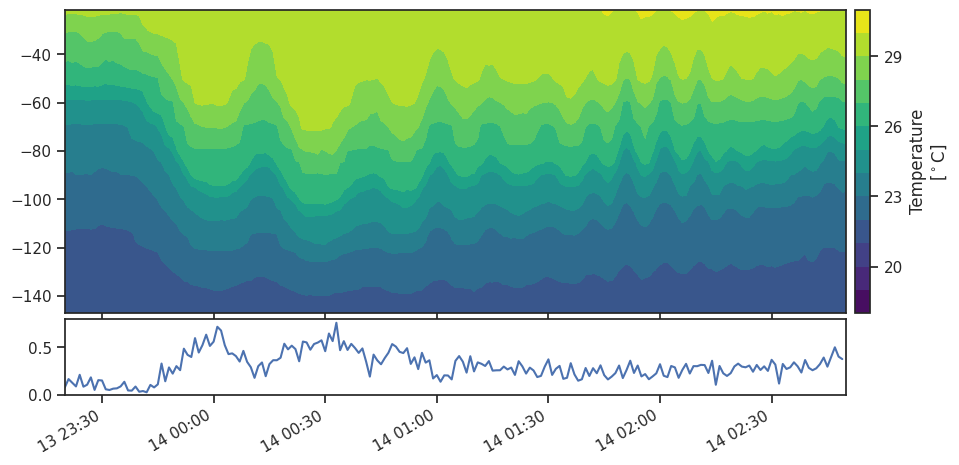

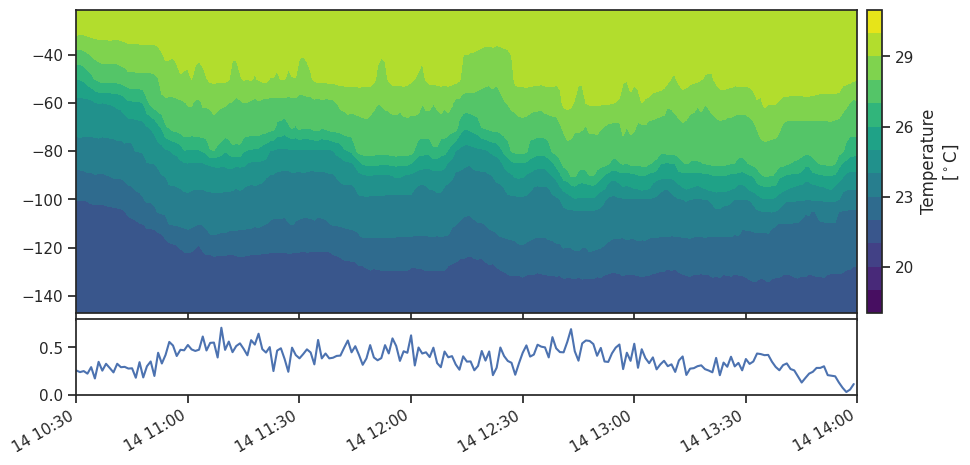

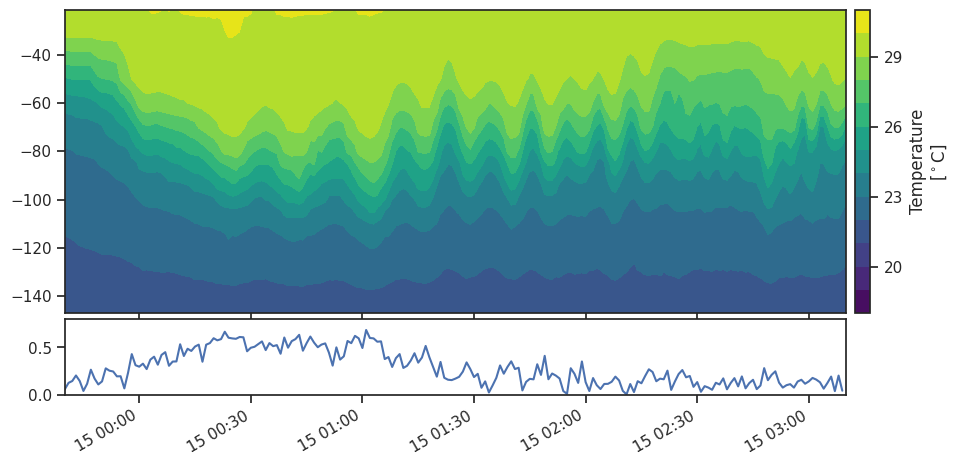

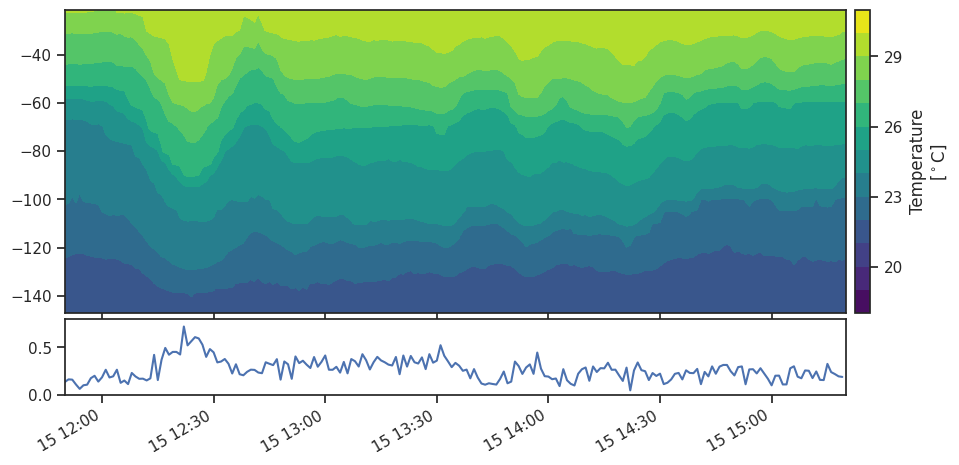

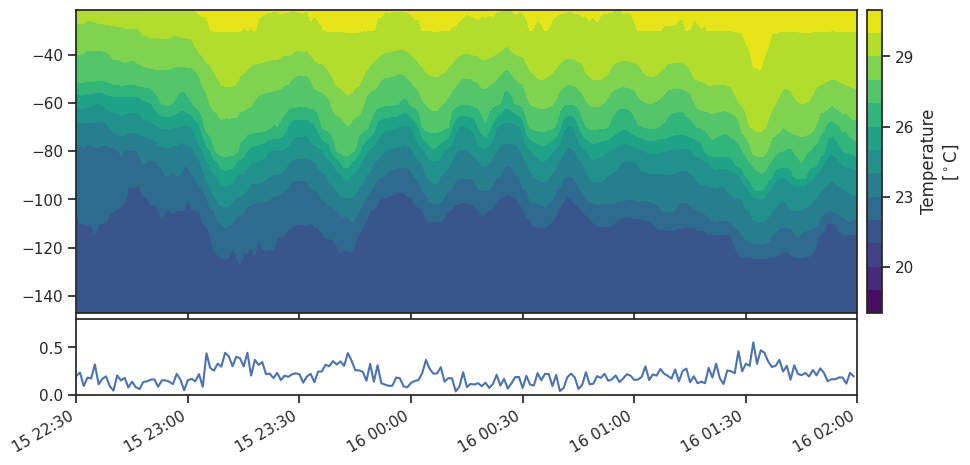

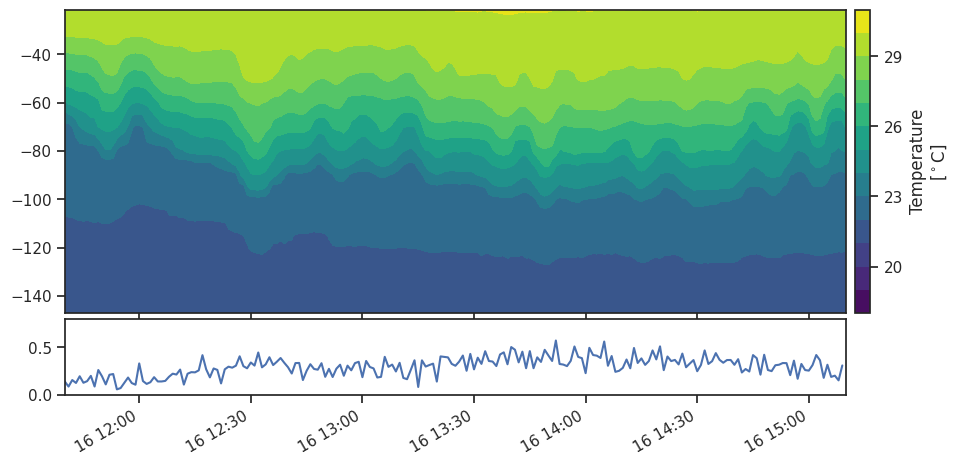

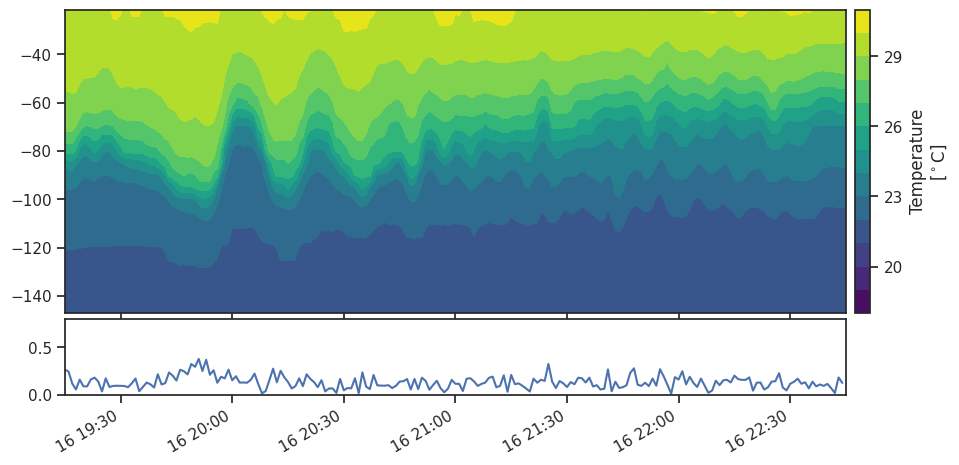

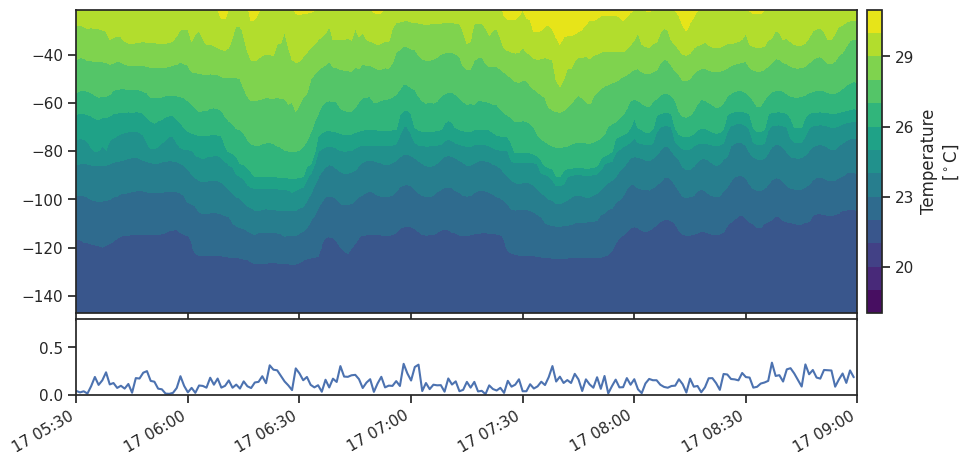

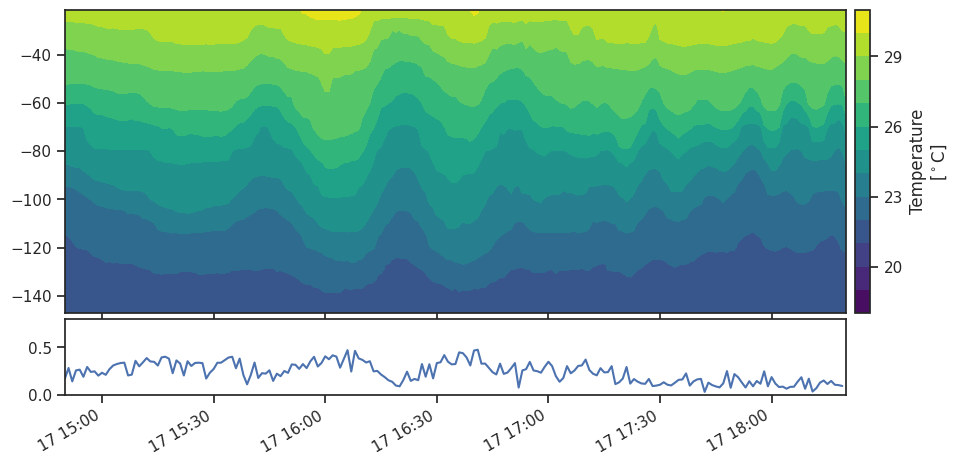

In [5]:
for wave in wav_tx:

    temp_ix = (ds_temp['time'].values >= wave - t_bef) &\
                (ds_temp['time'].values <= wave + t_aft)
    adcp_ix = (ds_adcp['time'].values >= wave - t_bef) &\
                (ds_adcp['time'].values <= wave + t_aft)

    temp_temp = ds_temp['Temperature'][:,temp_ix]
    temp_temp = temp_temp.interpolate_na(dim='z_nom')

    fig, ax = vert_stack(2, hsize=12, vsize=2.5, h_ratio=[4,1], hspace=0.03)
    xr_t = ax[0].contourf(temp_temp.time, temp_temp.z_nom, temp_temp,\
                        levels=np.arange(18,31.01,1), cmap=plt.cm.viridis)
    cb = fig.colorbar(xr_t, ax=ax[0], pad=0.01, ticks=np.arange(20,29.1,3))
    mpl.colorbar.ColorbarBase.set_label(cb, 'Temperature\n[$^\circ$C]')

    ds_spd = np.sqrt((ds_adcp['u'].isel(distance=0, time=adcp_ix)**2) +\
                     (ds_adcp['v'].isel(distance=0, time=adcp_ix)**2))
    ds_spd.plot(ax=ax[1])
    ax[1].set_ylim(0, 0.8)
    plot_align(ax)
    basic_ts(temp_temp.time.values, ax)